In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests 

In [2]:
df = pd.read_csv("ab_browser_test.csv")
df.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [3]:
df.shape

(566134, 6)

# №1

In [195]:
(np.sum(df[df["slot"] == "exp"]["n_clicks"])/np.sum(df[df["slot"] == "control"]["n_clicks"]) - 1)*100

1.6135689824415822

# №2

Давайте попробуем посмотреть более внимательно на разницу между двумя группами (control и exp) относительно количества пользовательских кликов.

Для этого постройте с помощью бутстрепа 95% доверительный интервал для средних значений и медиан количества кликов в каждой из двух групп. Отметьте все верные утверждения.

In [3]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [4]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [5]:
control_n_clicks = df[df["slot"] == "control"]["n_clicks"].values
exp_n_clicks = df[df["slot"] == "exp"]["n_clicks"].values

In [8]:
control_n_clicks_median  = list(map(np.median, get_bootstrap_samples(control_n_clicks, 600)))
exp_n_clicks_median  = list(map(np.median, get_bootstrap_samples(exp_n_clicks, 600)))
delta_median = list(map(lambda x: x[0] - x[1], zip(control_n_clicks_median, exp_n_clicks_median)))
print("95% confidence interval for the difference between medians",  stat_intervals(delta_median, 0.05))

95% confidence interval for the difference between medians [-1. -1.]


In [9]:
control_n_clicks_mean  = list(map(np.mean, get_bootstrap_samples(control_n_clicks, 600)))
exp_n_clicks_mean  = list(map(np.mean, get_bootstrap_samples(exp_n_clicks, 600)))
delta_mean = list(map(lambda x: x[0] - x[1], zip(control_n_clicks_mean, exp_n_clicks_mean)))
print("95% confidence interval for the difference between medians",  stat_intervals(delta_mean, 0.05))

95% confidence interval for the difference between medians [-0.41155759 -0.1948506 ]


# №3

Поскольку данных достаточно много (порядка полумиллиона уникальных пользователей), отличие в несколько процентов может быть не только практически значимым, но и значимым статистически. Последнее утверждение нуждается в дополнительной проверке.

Посмотрите на выданные вам данные и выберите все верные варианты ответа относительно проверки гипотезы о равенстве среднего количества кликов в группах.

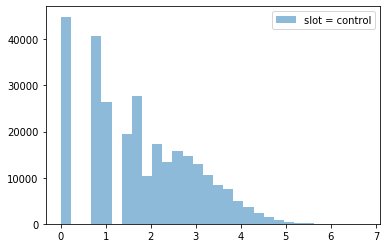

In [10]:
plt.hist(np.log(df.loc[df["slot"] == "control", "n_clicks"] + 1), alpha=0.5, label = "slot = control", bins = 30)
plt.legend(loc='upper right')

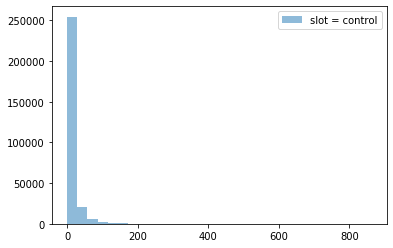

In [11]:
plt.hist(df.loc[df["slot"] == "control", "n_clicks"], alpha=0.5, label = "slot = control", bins = 30)
plt.legend(loc='upper right')

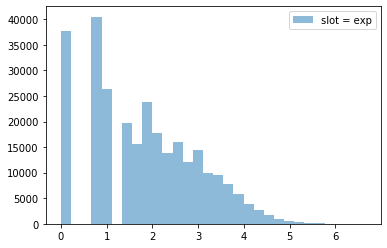

In [12]:
plt.hist(np.log(df.loc[df["slot"] == "exp", "n_clicks"] + 1), alpha=0.5, label = "slot = exp", bins = 30)
plt.legend(loc='upper right')

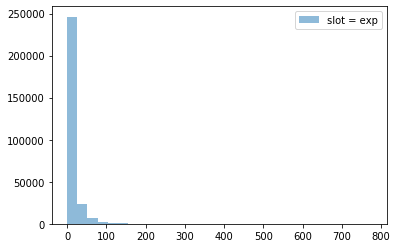

In [13]:
plt.hist(df.loc[df["slot"] == "exp", "n_clicks"], alpha=0.5, label = "slot = exp", bins = 30)
plt.legend(loc='upper right')

# 4
1. Получите из данных n_boot_samples псевдовыборок.
2. По каждой из этих выборок посчитайте среднее и сумму квадратов отклонения от выборочного среднего (control_boot_chi_squared)\
3. Для получившегося вектора средних значений из n_boot_samples постройте q-q plot с помощью scipy.stats.probplot для нормального распределения\
4. Для получившегося вектора сумм квадратов отклонения от выборочного среднего постройте qq-plot с помощью scipy.stats.probplot для хи-квадрат распределения с помощью команды

((array([-2.99209858e+00, -2.71015927e+00, -2.55162541e+00, -2.43921385e+00,
         -2.35113311e+00, -2.27822091e+00, -2.21572267e+00, -2.16084152e+00,
         -2.11178767e+00, -2.06734403e+00, -2.02664403e+00, -1.98904794e+00,
         -1.95406954e+00, -1.92133033e+00, -1.89052965e+00, -1.86142459e+00,
         -1.83381593e+00, -1.80753820e+00, -1.78245240e+00, -1.75844061e+00,
         -1.73540186e+00, -1.71324904e+00, -1.69190643e+00, -1.67130780e+00,
         -1.65139483e+00, -1.63211595e+00, -1.61342528e+00, -1.59528183e+00,
         -1.57764883e+00, -1.56049314e+00, -1.54378481e+00, -1.52749667e+00,
         -1.51160399e+00, -1.49608418e+00, -1.48091659e+00, -1.46608224e+00,
         -1.45156367e+00, -1.43734479e+00, -1.42341071e+00, -1.40974764e+00,
         -1.39634279e+00, -1.38318426e+00, -1.37026095e+00, -1.35756253e+00,
         -1.34507932e+00, -1.33280226e+00, -1.32072287e+00, -1.30883317e+00,
         -1.29712567e+00, -1.28559331e+00, -1.27422944e+00, -1.26302778e+00,

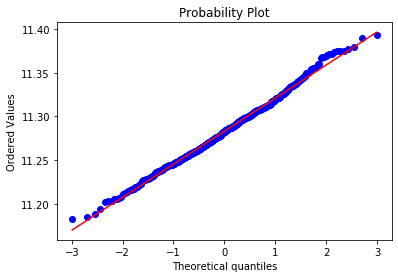

In [6]:
np.random.seed(0)
n_boot_samples = 500
control_boot_n_clicks  = get_bootstrap_samples(control_n_clicks, n_boot_samples)
control_boot_n_clicks_mean  = list(map(np.mean, control_boot_n_clicks))
control_boot_n_clicks_sq  = list(map(lambda s: np.sum(s - np.mean(s)), control_boot_n_clicks))
stats.probplot(control_boot_n_clicks_mean, plot=plt)

In [11]:
0.9979748364604202**2

0.9959537742082024

((array([282301.08823052, 282512.70968151, 282631.75042717, 282716.17888969,
         282782.3450597 , 282837.12445286, 282884.08540284, 282925.32718789,
         282962.19330369, 282995.59740261, 283026.19007273, 283054.45161344,
         283080.74708391, 283105.36069051, 283128.51819018, 283150.40200679,
         283171.16173792, 283190.92164617, 283209.78611976, 283227.84373074,
         283245.17030322, 283261.83126848, 283277.88349787, 283293.37674667,
         283308.35480452, 283322.85642111, 283336.91605832, 283350.56450624,
         283363.82939197, 283376.73560265, 283389.30563983, 283401.55991797,
         283413.51701739, 283425.19389989, 283436.60609342, 283447.76785089,
         283458.69228763, 283469.39150054, 283479.87667212, 283490.1581613 ,
         283500.24558336, 283510.1478802 , 283519.87338258, 283529.42986513,
         283538.82459547, 283548.06437779, 283557.15559197, 283566.10422857,
         283574.91592026, 283583.59597014, 283592.14937729, 283600.58085989,

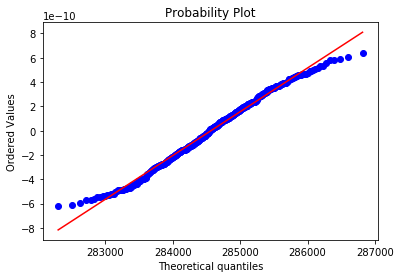

In [10]:
np.random.seed(0)
n = len(control_n_clicks)
stats.probplot(control_boot_n_clicks_sq, dist="chi2", 
                     sparams=(n-1), plot=plt)

In [12]:
0.9958426452996888**2

0.9917025741974818

5. Одним из возможных аналогов t-критерия, которым можно воспрользоваться, является тест Манна-Уитни. На достаточно обширном классе распределений он является асимптотически более эффективным, чем t-критерий, и при этом не требует параметрических предположений о характере распределения.

Разделите выборку на две части, соответствующие control и exp группам. Преобразуйте данные к виду, чтобы каждому пользователю соответствовало суммарное значение его кликов. С помощью критерия Манна-Уитни проверьте гипотезу о равенстве средних. Что можно сказать о получившемся значении достигаемого уровня значимости ? Выберите все правильные ответы

In [51]:
df_control = df[df["slot"] == "control"]
df_exp = df[df["slot"] == "exp"]

198713    2
128307    2
249019    2
165597    2
267320    2
324739    2
183846    2
38315     2
257406    2
171130    2
Name: userID, dtype: int64

In [54]:
df_control = pd.pivot_table(df_control, values='n_clicks', index=['userID'], aggfunc=np.sum)
df_exp = pd.pivot_table(df_exp, values='n_clicks', index=['userID'], aggfunc=np.sum)

In [56]:
stats.mannwhitneyu(df_control, df_exp)

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

6.Вопрос 6
Проверьте, для какого из браузеров наиболее сильно выражено отличие между количеством кликов в контрольной и экспериментальной группах.

Для этого примените для каждого из срезов (по каждому из уникальных значений столбца browser) критерий Манна-Уитни между control и exp группами и сделайте поправку Холма-Бонферрони на множественную проверку с \alpha=0.05α=0.05.

Какое заключение можно сделать исходя из полученных результатов ?

В качестве ответа введите количество незначимых изменений с точки зрения результатов, полученных после введения коррекции.

In [125]:
browser_n_clicks = [[df[(df["browser"] == br) & (df["slot"] == "control")].n_clicks.values,\
                     df[(df["browser"] == br) & (df["slot"] == "exp")].n_clicks.values] for br in df.browser.unique()]


In [183]:
p = list(map(lambda browser: stats.mannwhitneyu(browser[0], browser[1])[1], browser_n_clicks))

In [184]:
reject, p_corrected, a1, a2 = multipletests(p, 
                                            alpha = 0.05, 
                                            method = 'holm') 

In [185]:
p_corrected

array([0.1362193 , 0.81521235, 0.        , 0.14960241, 0.81521235,
       0.77221655])

In [186]:
p

[0.0272438604197241,
 0.40760617658454984,
 0.0,
 0.03740060143010802,
 0.45366656388735377,
 0.2574055152210032]

In [191]:
reject

array([False, False,  True, False, False, False])

7.Вопрос 7
Для каждого браузера в каждой из двух групп (control и exp) посчитайте долю запросов, в которых пользователь не кликнул ни разу. Это можно сделать, поделив сумму значений n_nonclk_queries на сумму значений n_queries. Умножив это значение на 100, получим процент некликнутых запросов, который можно легче проинтерпретировать.

Сходятся ли результаты проведенного Вами анализа с показателем процента некликнутых запросов ? Отметьте все верные утверждения.

In [193]:
browser_non_clicks = [[np.sum(df[(df["browser"] == br) & (df["slot"] == "control")].n_nonclk_queries)/np.sum(df[(df["browser"] == br) & (df["slot"] == "control")].n_queries), \
                     np.sum(df[(df["browser"] == br) & (df["slot"] == "exp")].n_nonclk_queries)/np.sum(df[(df["browser"] == br) & (df["slot"] == "exp")].n_queries)]\
                     for br in df.browser.unique()]


In [194]:
browser_non_clicks

[[0.4596274717919465, 0.449827469485547],
 [0.4697092963514274, 0.4514294190358467],
 [0.5759041136008114, 0.4375561736127329],
 [0.36299366746282086, 0.3693741284866483],
 [0.4054048474338329, 0.3897737648371716],
 [0.40593976593513353, 0.3985394721969546]]